### Pre-Lab

Getting magnitude spectrum

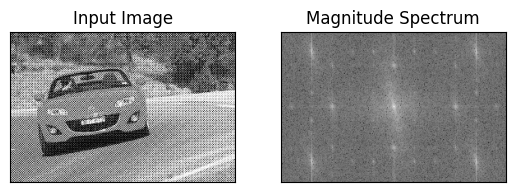

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('car.jpg',0) ## read image as grayscale
f = np.fft.fft2(img) ## pass grayscale image

fshift = np.fft.fftshift(f) ## Shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(np.abs(fshift)) ## apply logarithm, otherwise the image can not identify easily, change and see the changes.

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


Re construct image from frequancy domain

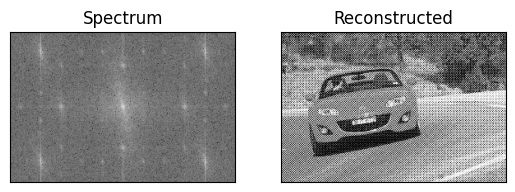

In [3]:
I2 = np.fft.ifft2(f) # f is transformed image
I3 = np.real(I2) # get the real part

plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(I3, cmap = 'gray')
plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])
plt.show()


Low pass filtering

Basic Steps in DFT Filtering
The following summarize the basic steps in DFT Filtering
1. Obtain the Fourier transform :
○ F=fft2(f)
2. Generate a filter function, H
3. Multiply the transform by the filter :
○ G=H.*F
4. Compute the inverse DFT:
○ g=ifft2(G)
5. Obtain the real part of the inverse FFT of g:
○ g2=real(g);

Let's try a low-pass filter for an image..

In [4]:
img = cv.imread('car.jpg',0)
img_float32 = np.float32(img)

dft = cv.dft(img_float32, flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = img.shape
crow, ccol = rows//2 , cols//2 # center

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols,2) , np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

In [5]:
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

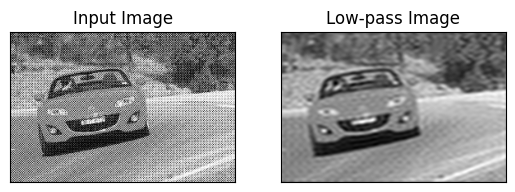

In [6]:
# Plotting
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low-pass Image'), plt.xticks([]), plt.yticks([])
plt.show()


1. Apply high pass laplacian filter on Car.jpg image.

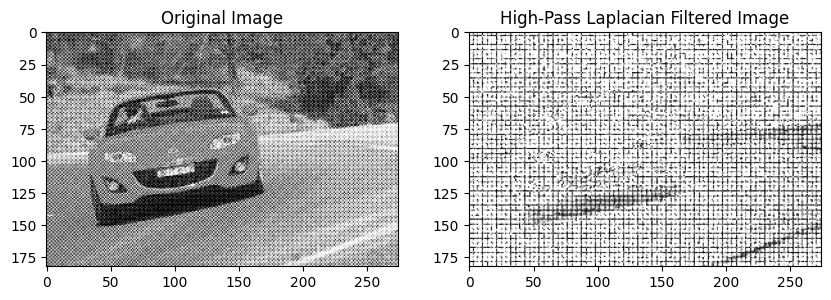

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv.imread('car.jpg', 0)

# Apply Laplacian filter
laplacian = cv.Laplacian(img, cv.CV_64F)

# Convert Laplacian output to uint8 for display
laplacian_uint8 = cv.convertScaleAbs(laplacian)


# Display the original and Laplacian filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_uint8, cmap='gray')
plt.title('High-Pass Laplacian Filtered Image')

plt.show()


2. Apply ideal high-pass filter on Car.jpg image for D0=100

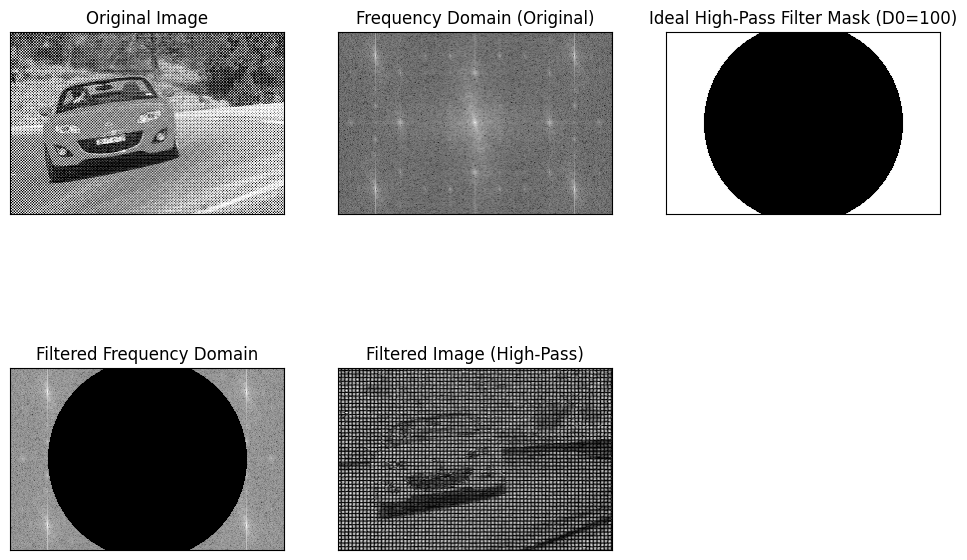

In [22]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv.imread('car.jpg', 0)  # Load in grayscale
rows, cols = img.shape

# Perform FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # Shift to get the low frequencies at the center

# Compute the magnitude spectrum (log-transformed for better visualization)
magnitude_spectrum = np.log(1 + np.abs(fshift))

# Create Ideal High-Pass Filter (IHPF)
D0 = 100  # Cutoff frequency
mask = np.zeros((rows, cols), np.uint8)

for i in range(rows):
    for j in range(cols):
        d = np.sqrt((i - rows/2)**2 + (j - cols/2)**2)  # Distance from center
        if d > D0:
            mask[i, j] = 1  # Preserve high frequencies

# Apply the filter in the frequency domain
fshift_filtered = fshift * mask  # Multiply frequency spectrum with filter mask

# Compute the magnitude spectrum after filtering
magnitude_spectrum_filtered = np.log(1 + np.abs(fshift_filtered))

# Perform Inverse FFT to reconstruct the image
f_ishift = np.fft.ifftshift(fshift_filtered)  # Inverse shift
img_back = np.fft.ifft2(f_ishift)  # Inverse FFT
img_back = np.abs(img_back)  # Take real part

# Display the results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

# Magnitude Spectrum (Original)
plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Domain (Original)')
plt.xticks([]), plt.yticks([])

# High-Pass Filter Mask
plt.subplot(2, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Ideal High-Pass Filter Mask (D0=100)')
plt.xticks([]), plt.yticks([])

# Magnitude Spectrum After Filtering
plt.subplot(2, 3, 4)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Filtered Frequency Domain')
plt.xticks([]), plt.yticks([])

# Reconstructed Image After High-Pass Filtering
plt.subplot(2, 3, 5)
plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image (High-Pass)')
plt.xticks([]), plt.yticks([])

plt.show()


3. Apply ideal low-pass filter on Car.jpg image for D0=100

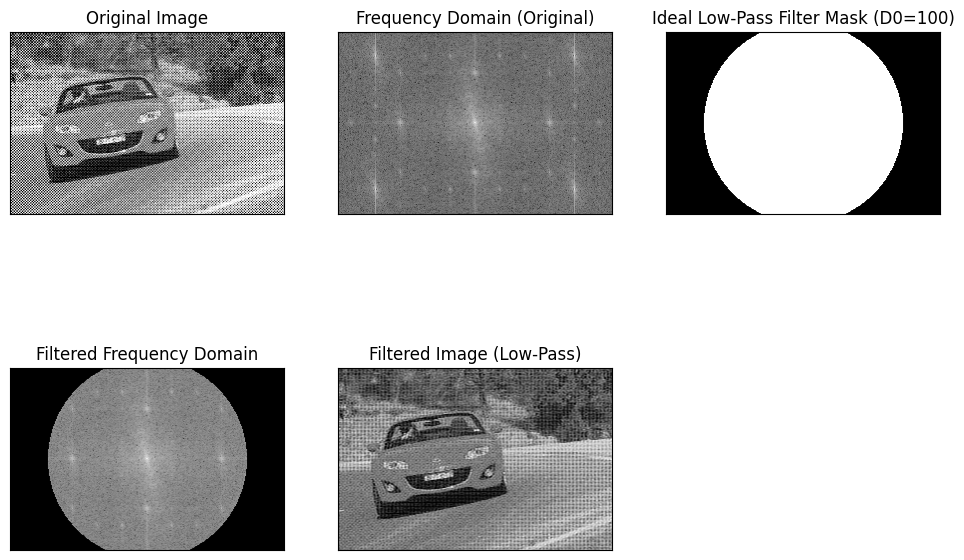

In [75]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv.imread('car.jpg', 0)  # Load in grayscale
rows, cols = img.shape

# Perform FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # Shift to get the low frequencies at the center

# Compute the magnitude spectrum (log-transformed for better visualization)
magnitude_spectrum = np.log(1 + np.abs(fshift))

# Create Ideal Low-Pass Filter (ILPF)
D0 = 100  # Cutoff frequency
mask = np.zeros((rows, cols), np.uint8)

for i in range(rows):
    for j in range(cols):
        d = np.sqrt((i - rows/2)**2 + (j - cols/2)**2)  # Distance from center
        if d <= D0:  # Only keep low frequencies (inside the radius)
            mask[i, j] = 1

# Apply the filter in the frequency domain
fshift_filtered = fshift * mask  # Multiply frequency spectrum with filter mask

# Compute the magnitude spectrum after filtering
magnitude_spectrum_filtered = np.log(1 + np.abs(fshift_filtered))

# Perform Inverse FFT to reconstruct the image
f_ishift = np.fft.ifftshift(fshift_filtered)  # Inverse shift
img_back = np.fft.ifft2(f_ishift)  # Inverse FFT
img_back = np.abs(img_back)  # Take real part

# Display the results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

# Magnitude Spectrum (Original)
plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Domain (Original)')
plt.xticks([]), plt.yticks([])

# Low-Pass Filter Mask
plt.subplot(2, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Ideal Low-Pass Filter Mask (D0=100)')
plt.xticks([]), plt.yticks([])

# Magnitude Spectrum After Filtering
plt.subplot(2, 3, 4)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Filtered Frequency Domain')
plt.xticks([]), plt.yticks([])

# Reconstructed Image After Low-Pass Filtering
plt.subplot(2, 3, 5)
plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image (Low-Pass)')
plt.xticks([]), plt.yticks([])

plt.show()


4. Apply FFT2, IFFT2, low-pass Gaussian filter, and high-pass laplacian filter on Car.jpg image.

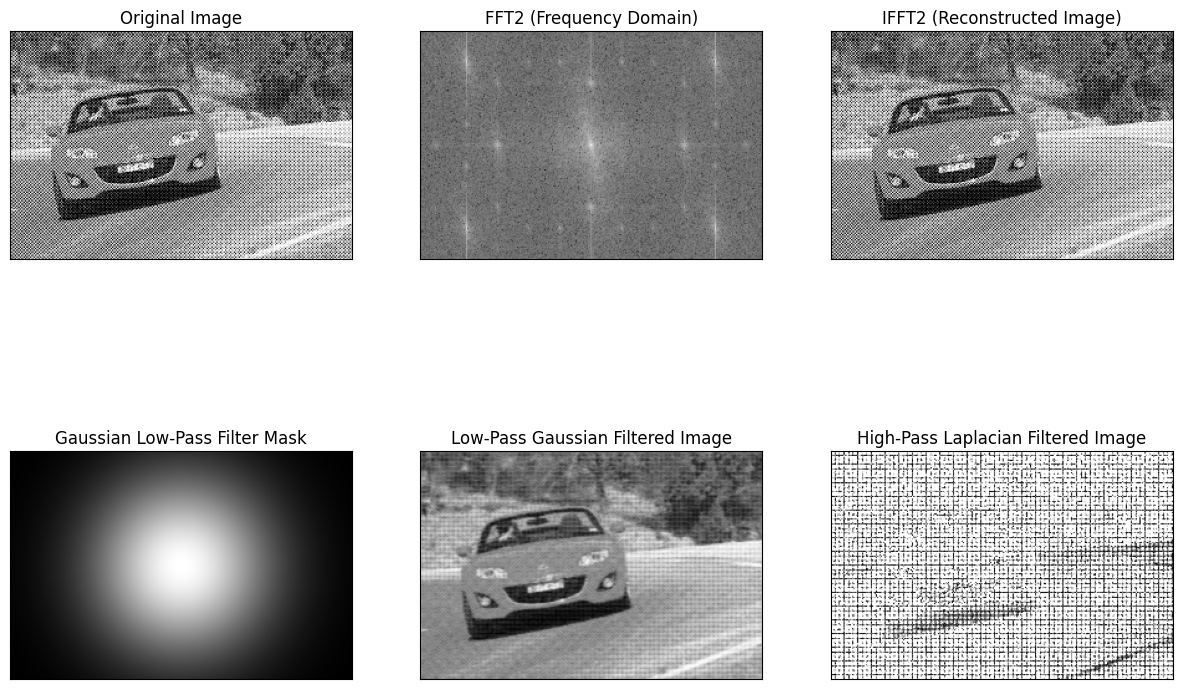

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv.imread('car.jpg', 0)
rows, cols = img.shape

# 1️ FFT2 (Convert to Frequency Domain)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# 2️ IFFT2 (Reconstruct Image)
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# 3️ Gaussian Low-Pass Filter Function
def gaussian_filter(shape, D0):
    rows, cols = shape
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - rows/2)**2 + (j - cols/2)**2)  # Distance from center
            mask[i, j] = np.exp(-(d**2)/(2*(D0**2)))  # Gaussian function
    return mask

D0 = 50  # Cutoff frequency
gaussian_mask = gaussian_filter(img.shape, D0)  # Create Gaussian filter mask

# Apply Gaussian Filter
fshift_gaussian = fshift * gaussian_mask
f_ishift_gaussian = np.fft.ifftshift(fshift_gaussian)
img_gaussian = np.fft.ifft2(f_ishift_gaussian)
img_gaussian = np.abs(img_gaussian)

# 4️ High-Pass Laplacian Filter
laplacian = cv.Laplacian(img, cv.CV_64F)
laplacian_uint8 = cv.convertScaleAbs(laplacian)

# **Display All the Results**
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 2), plt.imshow(np.abs(magnitude_spectrum), cmap='gray')
plt.title('FFT2 (Frequency Domain)'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 3), plt.imshow(img_back, cmap='gray')
plt.title('IFFT2 (Reconstructed Image)'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 4), plt.imshow(gaussian_mask, cmap='gray')  # Display Gaussian Mask
plt.title('Gaussian Low-Pass Filter Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 5), plt.imshow(img_gaussian, cmap='gray')
plt.title('Low-Pass Gaussian Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 6), plt.imshow(laplacian_uint8, cmap='gray')
plt.title('High-Pass Laplacian Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()


5. Apply the necessary filter and correct the noise in the image. Image file is uploaded.

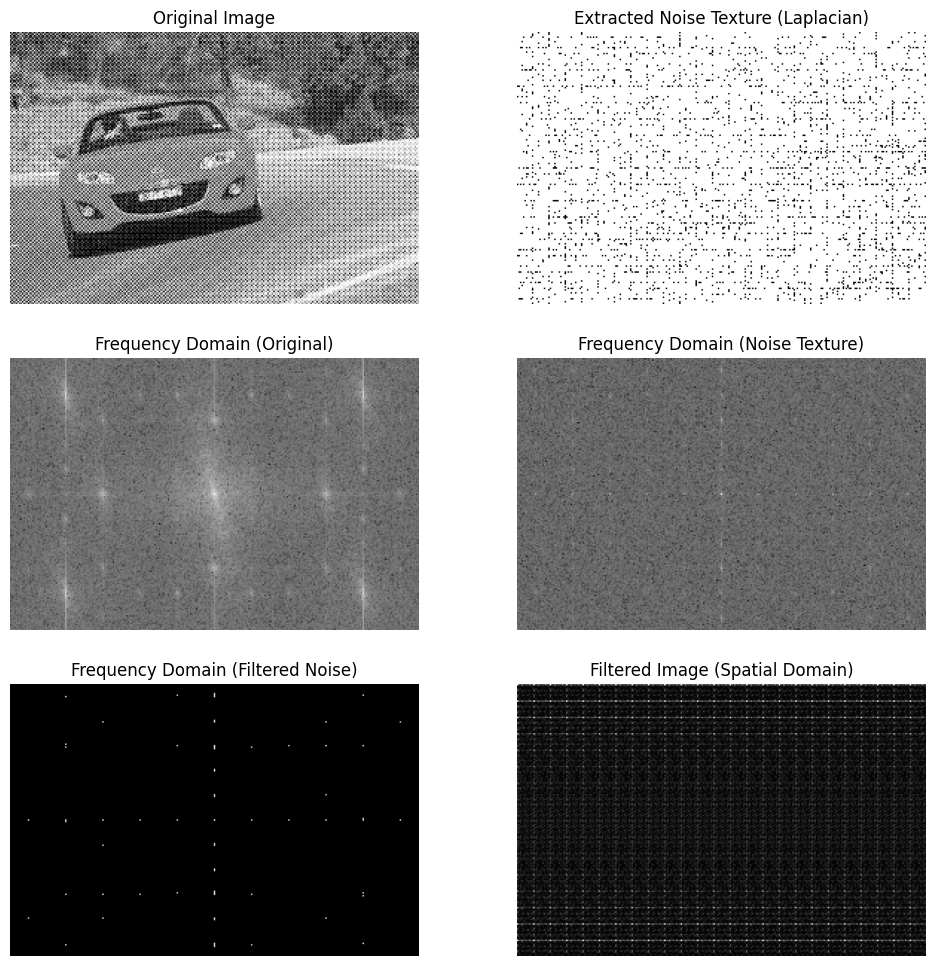

In [116]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("car.jpg", cv2.IMREAD_GRAYSCALE) 

noise_threshold_factor = 0.68
threshold = 30

if image is None:
    raise ValueError("Error loading image. Check the file path.")

# Apply Laplacian high-pass filter to extract noise texture
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Apply a threshold to the Laplacian filtered image to remove weak noise
_, laplacian = cv2.threshold(laplacian, threshold, 255, cv2.THRESH_BINARY)

# Compute Fourier Transform of the image
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = np.log1p(np.abs(dft_shift))

# Compute Fourier Transform of the high-pass filtered image (noise texture)
dft_noise = np.fft.fft2(laplacian)
dft_shift_noise = np.fft.fftshift(dft_noise)

# Create a mask based on the magnitude spectrum of the noise
magnitude_spectrum_noise = np.log1p(np.abs(dft_shift_noise))

# Define a threshold to extract noise frequencies
noise_threshold = np.max(magnitude_spectrum) * noise_threshold_factor
noise_mask = magnitude_spectrum_noise > noise_threshold

# Apply the noise mask to the frequency spectrum
filtered_dft = magnitude_spectrum * noise_mask

final_image = dft * filtered_dft

# Inverse FFT to get back the denoised image
filtered_dft = np.fft.ifftshift(filtered_dft)
filtered_image = np.fft.ifft2(filtered_dft)
filtered_image = np.abs(filtered_image)
# Compute the new magnitude spectrum after noise removal
magnitude_spectrum_filtered = np.log1p(np.abs(np.fft.fftshift(filtered_dft)))

# Display results
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].imshow(image, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(laplacian, cmap="gray")
axes[0, 1].set_title("Extracted Noise Texture (Laplacian)")
axes[0, 1].axis("off")

axes[1, 0].imshow(magnitude_spectrum, cmap="gray")
axes[1, 0].set_title("Frequency Domain (Original)")
axes[1, 0].axis("off")

axes[1, 1].imshow(magnitude_spectrum_noise, cmap="gray")
axes[1, 1].set_title("Frequency Domain (Noise Texture)")
axes[1, 1].axis("off")

axes[2, 0].imshow(magnitude_spectrum_filtered, cmap="gray")
axes[2, 0].set_title("Frequency Domain (Filtered Noise)")
axes[2, 0].axis("off")

axes[2, 1].imshow(filtered_image, cmap="gray")
axes[2, 1].set_title("Filtered Image (Spatial Domain)")
axes[2, 1].axis("off")

plt.show()


6. Apply the sobel operator (filter) on Car.jpg in the Fourier domain to detect edges.

In [112]:
from scipy import fftpack

# Load the image in grayscale
img = cv.imread('car.jpg', 0)
img_float32 = np.float32(img)

# Perform the Fourier Transform of the image
image_freq = fftpack.fftshift(fftpack.fft2(img_float32))

# Create Sobel filters in the frequency domain
def sobel_filter(size):
    x_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Sobel filter in X direction
    y_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # Sobel filter in Y direction
    # Extend the Sobel filter to the size of the image
    x_filter_freq = np.pad(x_filter, ((0, size[0]-3), (0, size[1]-3)), mode='constant')
    y_filter_freq = np.pad(y_filter, ((0, size[0]-3), (0, size[1]-3)), mode='constant')
    return x_filter_freq, y_filter_freq

# Get the size of the image
size = img.shape
sobel_x, sobel_y = sobel_filter(size)

# Convert Sobel filters to frequency domain
sobel_x_freq = fftpack.fftshift(fftpack.fft2(sobel_x))
sobel_y_freq = fftpack.fftshift(fftpack.fft2(sobel_y))

# Multiply the image's frequency representation with the Sobel filters
image_edges_x_freq = image_freq * sobel_x_freq
image_edges_y_freq = image_freq * sobel_y_freq

# Inverse Fourier transform to get the edges in the spatial domain
image_edges_x = np.abs(fftpack.ifft2(fftpack.ifftshift(image_edges_x_freq)))
image_edges_y = np.abs(fftpack.ifft2(fftpack.ifftshift(image_edges_y_freq)))

# Combine the edge results (magnitude of both x and y components)
edges = np.sqrt(image_edges_x**2 + image_edges_y**2)

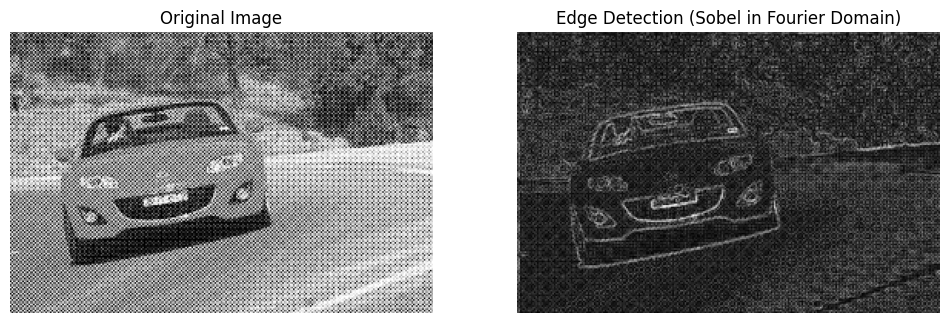

In [113]:
# Display the original and edge-detected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Sobel in Fourier Domain)')
plt.axis('off')

plt.show()

7. Discuss applying Butterworth and Chebyshev filters and compare the output image with the
Gaussian Filter image (You may use a preferred image to discuss the characteristics of the output
images in Q7.)

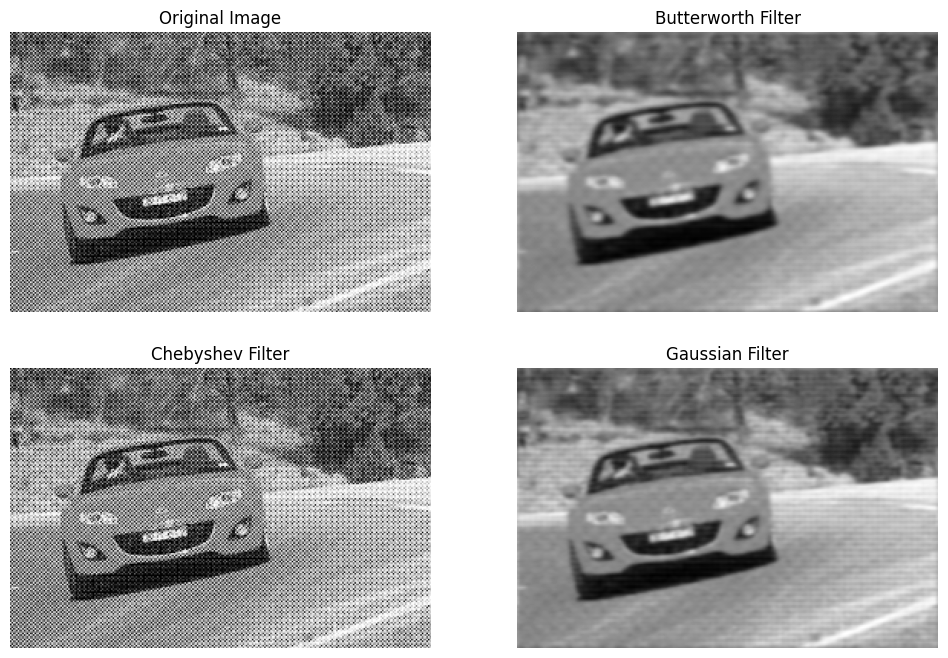

In [114]:
# Load image
image = cv.imread('car.jpg', 0)  # Load as grayscale

# Function to apply Butterworth filter
def butterworth_filter(image, d0, n=2):
    # Fourier transform of the image
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create Butterworth filter
    u = np.arange(0, rows) - crow
    v = np.arange(0, cols) - ccol
    U, V = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D/d0)**(2*n))

    # Apply filter in frequency domain
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    image_filtered = np.abs(np.fft.ifft2(f_ishift))

    return image_filtered

# Function to apply Chebyshev filter
def chebyshev_filter(image, d0, n=2, epsilon=0.1):
    # Fourier transform of the image
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create Chebyshev filter
    u = np.arange(0, rows) - crow
    v = np.arange(0, cols) - ccol
    U, V = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1 / np.sqrt(1 + (epsilon * D / d0)**(2 * n))

    # Apply filter in frequency domain
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    image_filtered = np.abs(np.fft.ifft2(f_ishift))

    return image_filtered

# Function to apply Gaussian filter
def gaussian_filter(image, d0):
    # Fourier transform of the image
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create Gaussian filter
    u = np.arange(0, rows) - crow
    v = np.arange(0, cols) - ccol
    U, V = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = np.exp(-(D**2) / (2 * (d0**2)))

    # Apply filter in frequency domain
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    image_filtered = np.abs(np.fft.ifft2(f_ishift))

    return image_filtered

# Apply filters to the image
d0 = 30  # Cutoff frequency

butter_image = butterworth_filter(image, d0)
chebyshev_image = chebyshev_filter(image, d0)
gaussian_image = gaussian_filter(image, d0)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Butterworth Filter')
plt.imshow(butter_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Chebyshev Filter')
plt.imshow(chebyshev_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Gaussian Filter')
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')

plt.show()

#### Butterworth Filter

The Butterworth filter is a low-pass filter that smoothly reduces high-frequency components without a sharp cutoff. It effectively minimizes high-frequency noise while maintaining the overall structure of the image. The image processed with the Butterworth filter highlights these distinctions.

#### Chebyshev Filter

No significant visual differences are observed.

Comparison: Butterworth vs. Gaussian
Both the Butterworth and Gaussian filters serve as low-pass filters for image smoothing but differ in their frequency response characteristics. The Butterworth filter gradually attenuates high frequencies, helping to preserve details, whereas the Gaussian filter applies a bell-shaped attenuation, resulting in a more natural blur. While Butterworth retains edges better, Gaussian ensures more uniform noise reduction.